#01-data-exploration
In this notebook, we will explore the Higgs boson dataset to gain a better understanding of the data and its properties. We will perform some initial data analysis, such as checking for missing values, identifying the distribution of each feature, and visualizing the relationships between different features. This will help us determine any preprocessing steps that may be required before building and training our models.

#Importing Libraries
In this section, we will import the necessary libraries and packages that will be used throughout the notebook.

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

#Loading Data
Here, we will load the Higgs boson dataset into a pandas DataFrame and inspect the data to get a better understanding of the data structure and format.

In [5]:
# Load data from CSV file into a pandas DataFrame
data_path = 'HIGGS_train.csv'
data = pd.read_csv(data_path, header=None, low_memory=False)
print(tabulate(data.head(), headers='keys', tablefmt='psql'))

+----+-----+-------+--------+--------+-------+--------+-------+--------+--------+------+-------+--------+--------+------+-------+--------+--------+------+-------+---------+-----------+------+-------+-------+-------+-------+-------+-------+-------+
|    |   0 |     1 |      2 |      3 |     4 |      5 |     6 |      7 |      8 |    9 |    10 |     11 |     12 |   13 |    14 |     15 |     16 |   17 |    18 |      19 |        20 |   21 |    22 |    23 |    24 |    25 |    26 |    27 |    28 |
|----+-----+-------+--------+--------+-------+--------+-------+--------+--------+------+-------+--------+--------+------+-------+--------+--------+------+-------+---------+-----------+------+-------+-------+-------+-------+-------+-------+-------|
|  0 |   1 | 0.869 | -0.635 |  0.226 | 0.327 | -0.69  | 0.754 | -0.249 | -1.09  | 0    | 1.37  | -0.654 |  0.93  | 1.11 | 1.14  | -1.58  | -1.05  | 0    | 0.658 | -0.0105 | -0.0458   |  3.1 | 1.35  | 0.98  | 0.978 | 0.92  | 0.722 | 0.989 | 0.877 |
|  1 |  

#Preprocessing
In this section, we will preprocess the data by performing necessary data cleaning, normalization, and feature engineering. We will also split the dataset into training and validation sets for model training and evaluation.

In [8]:
# Check for missing or invalid values
print(data.isna().sum())

# Drop rows with missing values, if any
data = data.dropna()

# Check data types of each column
print(data.dtypes)

# Create a new, independent copy of the DataFrame
data_clean = data.copy()

# Iterate through each column
for column in data_clean.columns:
    # Replace non-numeric values with NaN and convert the column to float64
    data_clean.loc[:, column] = pd.to_numeric(data_clean[column], errors='coerce')

    # Replace NaN values with the mean of the respective column
    data_clean.loc[:, column] = data_clean[column].fillna(data_clean[column].mean())

# Check data types of each column after cleaning
print(data_clean.dtypes)

# Separate the class_label column
class_labels = data_clean['class_label']

# Select only the feature columns (exclude the class_label column)
feature_columns = data_clean.drop('class_label', axis=1)

# Normalize the feature columns
scaler = StandardScaler()
normalized_features = scaler.fit_transform(feature_columns)

# Convert the normalized features back to a DataFrame
normalized_features_df = pd.DataFrame(normalized_features, columns=feature_columns.columns)

# Add the class_label column back to the DataFrame
normalized_data = pd.concat([class_labels, normalized_features_df], axis=1)

class_label        0
lep_pt             0
lep_eta            0
lep_phi            0
miss_energy_mag    0
miss_energy_phi    0
jet1_pt            0
jet1_eta           0
jet1_phi           0
jet1_btag          0
jet2_pt            0
jet2_eta           0
jet2_phi           0
jet2_btag          0
jet3_pt            0
jet3_eta           0
jet3_phi           0
jet3_btag          0
jet4_pt            0
jet4_eta           0
jet4_phi           0
jet4_btag          0
m_jj               0
m_jjj              0
m_lv               0
m_jlv              0
m_bb               0
m_wbb              0
m_wwbb             0
dtype: int64
class_label        float64
lep_pt             float64
lep_eta            float64
lep_phi            float64
miss_energy_mag    float64
miss_energy_phi    float64
jet1_pt            float64
jet1_eta           float64
jet1_phi           float64
jet1_btag          float64
jet2_pt            float64
jet2_eta           float64
jet2_phi           float64
jet2_btag          float64


#Exploratory Data Analysis
In this section, we will perform exploratory data analysis by visualizing and analyzing the data to identify any patterns, trends, or relationships between different features. We will also identify any potential issues or anomalies in the data.

Number of rows and columns:  (141113, 29)
         class_label        lep_pt       lep_eta       lep_phi  \
count  141113.000000  1.411130e+05  1.411130e+05  1.411130e+05   
mean        0.528116  1.576041e-17 -2.724084e-17 -7.754323e-18   
std         0.499211  1.000004e+00  1.000004e+00  1.000004e+00   
min         0.000000 -1.272561e+00 -2.413449e+00 -1.728432e+00   
25%         0.000000 -7.105048e-01 -7.331961e-01 -8.640515e-01   
50%         1.000000 -2.427174e-01  8.376263e-05  3.840309e-03   
75%         1.000000  4.438450e-01  7.344169e-01  8.617256e-01   
max         1.000000  1.212964e+01  2.415663e+00  1.733069e+00   

       miss_energy_mag  miss_energy_phi       jet1_pt      jet1_eta  \
count     1.411130e+05     1.411130e+05  1.411130e+05  1.411130e+05   
mean      3.459234e-16     4.745747e-18  2.495482e-16 -1.616323e-17   
std       1.000004e+00     1.000004e+00  1.000004e+00  1.000004e+00   
min      -1.668425e+00    -1.723014e+00 -1.780802e+00 -2.938136e+00   
25%     

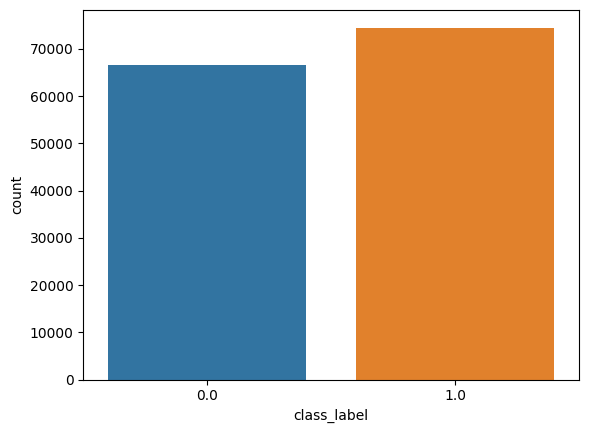

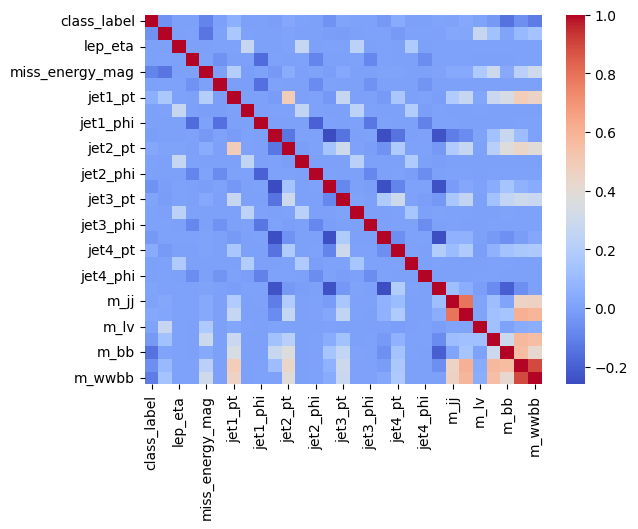

In [9]:
# Print the number of rows and columns in the dataset
print("Number of rows and columns: ", normalized_data.shape)

# Print the summary statistics of the dataset
print(normalized_data.describe())

# Plot a count plot of the class label
sns.countplot(data=normalized_data, x="class_label")
plt.show()

# Plot a correlation matrix of the features
corr = normalized_data.corr()
sns.heatmap(corr, cmap="coolwarm")
plt.show()

# Save the data to CSV files
normalized_data.to_csv('HIGGS_processed.csv', index=False)